# IIT Kharagpur Hackathon

Import the required modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

**Dataset cleaning and preprocessing:**
This dataset contains the following fields: Date,Open,High,Low,Close,Adj Close,Volume

- Date has to be in datetime data type
- Others are numeric data types (So no encoding required)

In [2]:
df = pd.read_csv("BTC-USD.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


## Golden Crossover:

The Golden Crossover is a commonly used trading strategy based on the intersection of two moving averages: a short-term moving average (e.g., 50-day) and a long-term moving average (e.g., 200-day). It's particularly popular in financial markets like stocks and cryptocurrencies.

## Here's how it works:

**Short-term Moving Average (Short MA):** Calculated using a shorter time frame, such as the average closing price over the last 50 days.

**Long-term Moving Average (Long MA):** Calculated using a longer time frame, often the average closing price over the last 200 days.

### Buy Signal (Golden Crossover): 
Occurs when the short-term moving average crosses above the long-term moving average. This suggests a bullish sentiment, indicating potential upward momentum in the market. Traders may consider this a buying opportunity.

### Sell or Loss Signal: 
Occurs when the short-term moving average crosses below the long-term moving average. This indicates a bearish sentiment, suggesting a potential downward trend in the market. Traders may consider this a selling or loss-cutting signal.

The Golden Crossover helps traders identify potential shifts in market trends and is often used as an entry or exit point for trades. However, it's important to note that no trading strategy guarantees success, and it's crucial to combine technical analysis with other indicators and risk management techniques.

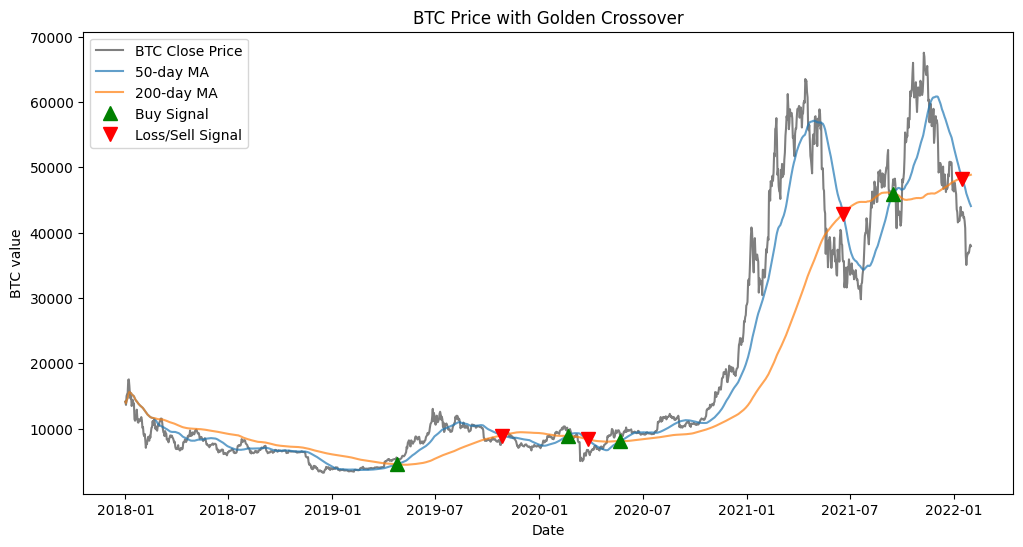

In [39]:
short_window = 50
long_window = 200

df['Short_MA'] = df['Open'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Open'].rolling(window=long_window, min_periods=1).mean()

df['Signal'] = 0
df.loc[df['Short_MA'] > df['Long_MA'], 'Signal'] = 1  # Set 1 for Golden Crossover

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], label='BTC Close Price', alpha=0.5, color="black")
plt.plot(df.index, df['Short_MA'], label='50-day MA', alpha=0.7)
plt.plot(df.index, df['Long_MA'], label='200-day MA', alpha=0.7)

previous_signal = df['Signal'].iloc[0]  # Initial signal
flag1 = True
flag2 = True
for index, row in df.iterrows():
    if row['Signal'] != previous_signal:
        if row['Signal'] == 1:
            if flag1:
                plt.plot(index, row['Short_MA'], '^', markersize=10, color='g', label = "Buy Signal")
                flag1 = False
            else:
                plt.plot(index, row['Short_MA'], '^', markersize=10, color='g')

        else:
            if flag2:
                plt.plot(index, row['Short_MA'], 'v', markersize=10, color='r', label = "Loss/Sell Signal")
                flag2 = False
            else:
                plt.plot(index, row['Short_MA'], 'v', markersize=10, color='r')
        previous_signal = row['Signal']

plt.title('BTC Price with Golden Crossover')
plt.xlabel('Date')
plt.ylabel('BTC value')
plt.legend()
plt.show()

## Death Crossover:
The Death Crossover is a technical analysis pattern used in financial markets, particularly in stock and cryptocurrency trading. It is the opposite of the more well-known Golden Crossover. The Death Crossover occurs when a short-term moving average crosses below a long-term moving average. The two key components involved are:

**Short-term Moving Average (Short MA):** This is a moving average calculated over a short period, often referred to as the "fast" moving average.

**Long-term Moving Average (Long MA):** This is a moving average calculated over a longer period, often referred to as the "slow" moving average.

When the short-term moving average crosses below the long-term moving average, it signals a potential shift in the trend from bullish to bearish. This crossing of the moving averages is considered a bearish signal because it suggests that recent price trends are weaker than longer-term trends, indicating possible selling pressure and a potential downturn in the market.

Traders and investors use Death Crossovers as a technical indicator to make informed decisions about when to sell or reduce their positions. It can serve as a warning sign of a possible trend reversal or a weakening trend.

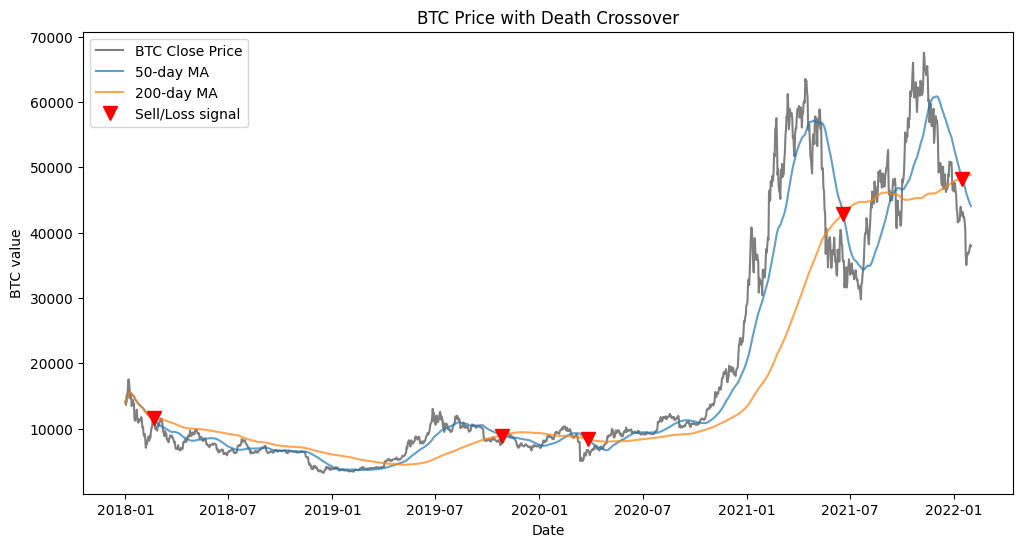

In [40]:
df['Short_MA'] = df['Open'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Open'].rolling(window=long_window, min_periods=1).mean()

df['Signal'] = 0
df.loc[df['Short_MA'] < df['Long_MA'], 'Signal'] = -1  # Set -1 for Death Crossover

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], label='BTC Close Price', alpha=0.5, color="black")
plt.plot(df.index, df['Short_MA'], label='50-day MA', alpha=0.7)
plt.plot(df.index, df['Long_MA'], label='200-day MA', alpha=0.7)

previous_signal = df['Signal'].iloc[0]
flag = True  
for index, row in df.iterrows():
    if row['Signal'] != previous_signal:
        if row['Signal'] == -1:
            if flag:
                plt.plot(index, row['Short_MA'], 'v', markersize=10, color='r', label = 'Sell/Loss signal')
                flag = False
            else: 
                plt.plot(index, row['Short_MA'], 'v', markersize=10, color='r')

        previous_signal = row['Signal']

plt.title('BTC Price with Death Crossover')
plt.xlabel('Date')
plt.ylabel('BTC value')
plt.legend()
plt.show()

## MAXIMUM DROPDOWN:

Maximum Dropdown, also known as Maximum Drawdown, is a crucial metric used in finance to assess the largest loss or decline experienced by an investment or asset within a specific time frame. It's calculated by measuring the peak-to-trough decline in value before a new peak is achieved.

It's a general risk assessment metric and can be applied after technical signals like Golden Crossover or Death Crossover to measure the maximum loss from the point of signal occurrence


To determine potential exit points for sales based on the Maximum Dropdown curve, you might consider exiting sales when there are signs of the downturn reversing. Here's a general approach:

**Exit Strategy based on Maximum Dropdown Curve:**

- **Reversal Signs:** Look for indications of the downturn's end or a potential uptrend.
- **Considerations:** Points where the Maximum Dropdown curve shows signs of bottoming out or starts to rise might suggest a potential reversal.

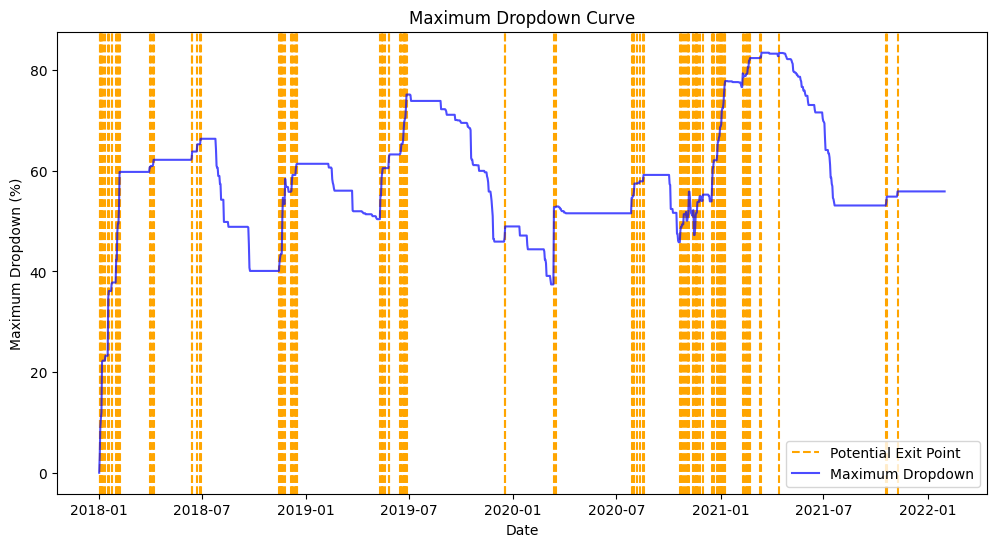

In [41]:
peak = df['Open'].rolling(window=long_window, min_periods=1).max()
trough = df['Open'].rolling(window=long_window, min_periods=1).min()
maximum_dropdown = ((peak - trough) / peak) * 100  # Calculate in percentage

exit_indices = []
for i in range(1, len(maximum_dropdown)):
    if maximum_dropdown[i] > maximum_dropdown[i - 1]:  # Look for a rising trend
        exit_indices.append(df.index[i]) 
        
plt.figure(figsize=(12, 6))
flag = True
for exit_point in exit_indices:
    if flag:
        plt.axvline(exit_point, color='orange', linestyle='--', label='Potential Exit Point')
        flag = False
    else:
        plt.axvline(exit_point, color='orange', linestyle='--')


plt.plot(df.index, maximum_dropdown, label='Maximum Dropdown', alpha=0.7, color="blue")
plt.title('Maximum Dropdown Curve')
plt.xlabel('Date')
plt.ylabel('Maximum Dropdown (%)')
plt.legend()
plt.show()

In [6]:
peak = df['Close'].max()  
trough = df['Close'].min() 

maximum_dropdown = ((peak - trough) / peak) * 100  # Calculate in percentage

print(f"The Maximum Dropdown is: {maximum_dropdown:.2f}%")


The Maximum Dropdown is: 95.21%


- seasonal arima
- pdq value arima
- lstm
- refer google stock prediction using lstm keras


LSTM

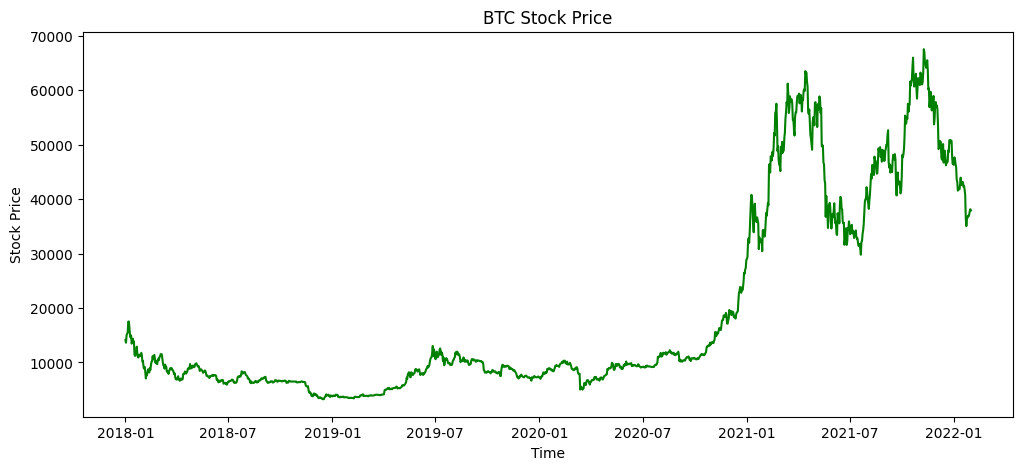

In [8]:
training_data = df[["Open"]]
plt.figure(figsize = (12,5))
plt.plot(training_data, color ='green');
plt.ylabel('Stock Price')
plt.title('BTC Stock Price')
plt.xlabel('Time')
plt.show()

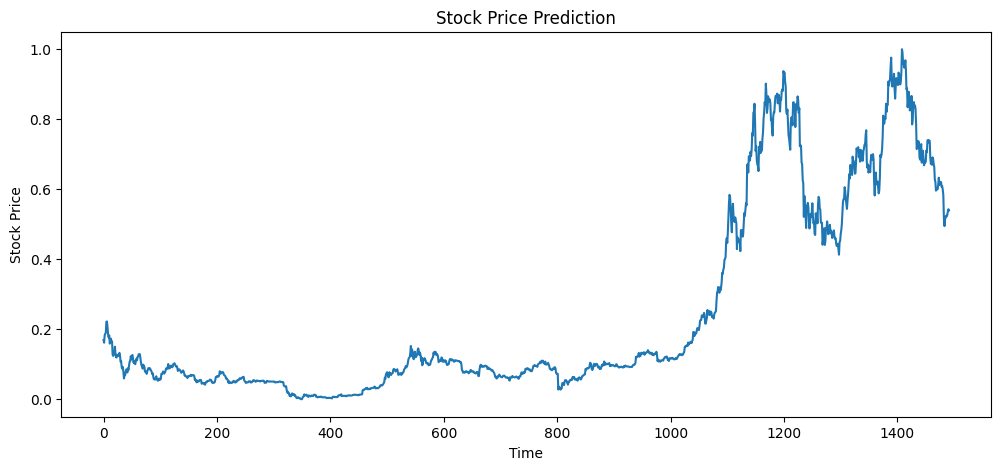

In [9]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = mm.fit_transform(training_data)
training_data_scaled.shape

plt.figure(figsize=(12,5))
plt.plot(training_data_scaled);
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()


In [30]:
# Define the percentage to be used for training (e.g., 80%)
#train_percentage = 0.8
#train_size = int(len(df) * train_percentage)

# Split the data into training and testing based on the percentage
#X_train, X_test = X.iloc[:train_size, :], X.iloc[train_size:, :]
#y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

total_data_points = len(training_data_scaled)
train_size = int(total_data_points * 0.7)  # 60% for training, 40% for testing

x_train = training_data_scaled[:train_size]
y_train = training_data_scaled[1:train_size + 1]

x_test = training_data_scaled[train_size:-1]
y_test = training_data_scaled[train_size + 1:]
#X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

We create an LSTM Model 

In [31]:
import keras 
from keras.models import Sequential #helps to create model, layer by layer.
from keras.layers import Dense, LSTM, Dropout

regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Adding second hidden layer
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

# Adding third hidden layer
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

#Adding fourth hidden layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding dense layer to get the final output. The input of n-1 layer, will be the output for n layer.
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

with open("LSTM.sav", "wb") as fobj:
    pickle.dump(regressor, fobj)


Epoch 1/100
33/33 [==============================] - 7s 6ms/step - loss: 0.0030
Epoch 2/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 3/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 4/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 5/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 6/100
33/33 [==============================] - 0s 7ms/step - loss: 3.6970e-04
Epoch 7/100
33/33 [==============================] - 0s 6ms/step - loss: 1.1208e-04
Epoch 8/100
33/33 [==============================] - 0s 7ms/step - loss: 9.9245e-05
Epoch 9/100
33/33 [==============================] - 0s 7ms/step - loss: 1.0591e-04
Epoch 10/100
33/33 [==============================] - 0s 7ms/step - loss: 9.5846e-05
Epoch 11/100
33/33 [==============================] - 0s 6ms/step - loss: 1.0178e-04
Epoch 12/100
33/33 [==============================] - 0s 6ms/step - loss: 1.1583e-04
Epoch 13/

## SHAP

ExactExplainer explainer: 448it [00:25, 10.58it/s]                         


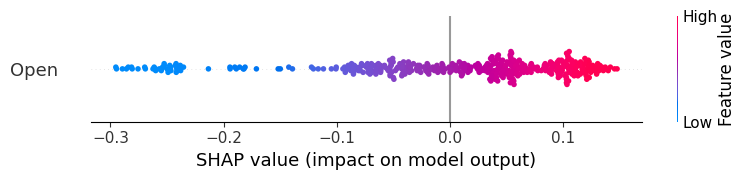

In [32]:
import shap

with open("LSTM.sav", "rb") as fobj:
    regressor = pickle.load(fobj)
    
# Explain the model predictions using SHAP values
explainer = shap.Explainer(regressor, masker=shap.maskers.Independent(x_test))
shap_values = explainer(x_test)

# Summary plot
shap.summary_plot(shap_values, x_test, feature_names=['Open'])

14/14 [==============================] - 1s 3ms/step


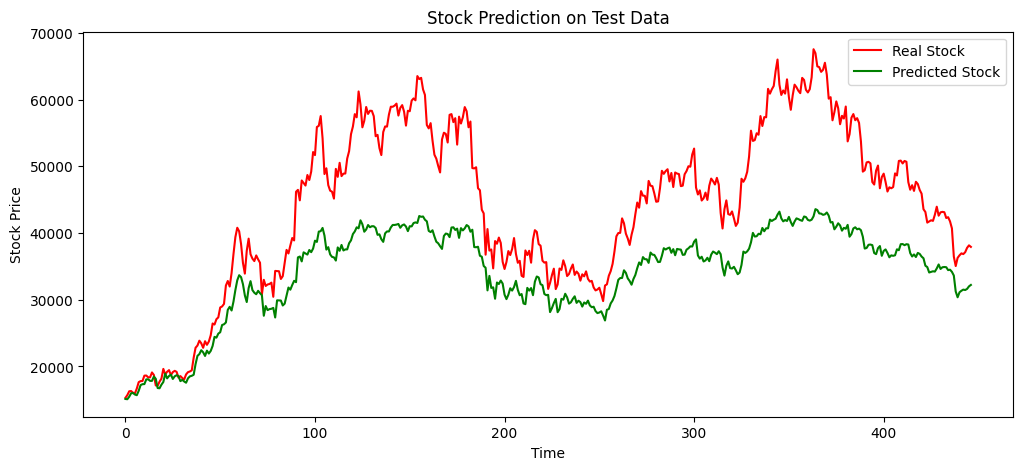

In [33]:
test_data = pd.read_csv("BTC-USD.csv")
test_stock = test_data.iloc[:,1:2]

input_value = mm.transform(test_stock)

# Making predictions on the test set
prediction = regressor.predict(x_test)
prediction = mm.inverse_transform(prediction)

# Aligning predictions with the test data index
test_stock = test_data['Open'].values
test_stock = test_stock[train_size + 1:]  # Align the test data index with predictions

# Plotting the predictions against the real stock prices
plt.figure(figsize=(12, 5))
plt.plot(test_stock, color='red', label='Real Stock')
plt.plot(prediction, color='green', label='Predicted Stock')
plt.title('Stock Prediction on Test Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# Metrics:

In [34]:
def calculate_metrics(test_stock, prediction, threshold=0.0):
    # Calculate daily returns
    daily_returns = np.diff(np.log(test_stock))  # Use log returns for accuracy

    # Positive and negative returns
    positive_returns = daily_returns[daily_returns > threshold][:len(test_stock)]
    negative_returns = daily_returns[daily_returns < -threshold][:len(test_stock)]

    # Calculate metrics
    total_trades = len(positive_returns) + len(negative_returns)
    win_rate = len(positive_returns) / total_trades if total_trades > 0 else 0.0
    gross_profit = np.sum(positive_returns) * np.max(test_stock)
    gross_loss = np.sum(negative_returns) * np.max(test_stock)
    net_profit = gross_profit - gross_loss
    max_drawdown = np.min(test_stock / np.maximum.accumulate(test_stock)) - 1
    avg_winning_trade = np.mean(positive_returns) * np.max(test_stock)
    avg_losing_trade = np.mean(negative_returns) * np.max(test_stock)
    buy_and_hold_return = np.log(test_stock[-1] / test_stock[0]) * 100  # Use log returns
    largest_losing_trade = np.min(np.abs(test_stock[:len(negative_returns)] * negative_returns))
    largest_winning_trade = np.max(np.abs(test_stock[:len(positive_returns)] * positive_returns))
    sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns)
    sortino_ratio = np.mean(daily_returns) / np.std(negative_returns)
    average_holding_duration = total_trades / len(test_stock)
    max_dip = np.min(test_stock / np.maximum.accumulate(test_stock)) - 1
    average_dip = np.mean(test_stock / np.maximum.accumulate(test_stock)) - 1
    # Display metrics
    print(f"1. Gross Profit: {gross_profit:.4f} USDT")
    print(f"2. Net Profit: {net_profit:.4f} USDT")
    print(f"3. Total Closed Trades: {total_trades}")
    print(f"4. Win Rate (Profitability %): {win_rate * 100:.2f}%")
    print(f"5. Max Drawdown: {max_drawdown * 100:.2f}%")
    print(f"6. Gross Loss: {gross_loss:.4f} USDT")
    print(f"7. Average Winning Trade: {avg_winning_trade:.4f} USDT")
    print(f"8. Average Losing Trade: {avg_losing_trade:.4f} USDT")
    print(f"9. Buy and Hold Return of BTC: {buy_and_hold_return:.2f}%")
    print(f"10. Largest Losing Trade: {largest_losing_trade:.4f} USDT")
    print(f"11. Largest Winning Trade: {largest_winning_trade:.4f} USDT")
    print(f"12. Sharpe Ratio: {sharpe_ratio:.4f}")
    print(f"13. Sortino Ratio: {sortino_ratio:.4f}")
    print(f"14. Average Holding Duration per Trade: {average_holding_duration:.2f} days")
    print(f"15. Max Dip: {max_dip * 100:.2f}%")
    print(f"16. Average Dip in Running Trade: {average_dip * 100:.2f}%")

In [36]:
# Load the trained LSTM model
with open("LSTM.sav", "rb") as fobj:
    regressor = pickle.load(fobj)

# Load the test data
test_data = pd.read_csv("BTC-USD.csv")
test_stock = test_data.iloc[:, 1:2]

# Normalize the test data
mm = MinMaxScaler(feature_range=(0, 1))
input_value = mm.fit_transform(test_stock)

# Make predictions on the test set
prediction = regressor.predict(input_value)
prediction = mm.inverse_transform(prediction)

# Aligning predictions with the test data index
test_stock = test_data['Open'].values
train_size = int(len(test_stock) * 0.7)
test_stock = test_stock[train_size + 2:]

# Calculate and display metrics
calculate_metrics(test_stock[1:], prediction)

47/47 [==============================] - 2s 4ms/step
1. Gross Profit: 479549.6875 USDT
2. Net Profit: 901968.0115 USDT
3. Total Closed Trades: 444
4. Win Rate (Profitability %): 51.80%
5. Max Drawdown: -53.09%
6. Gross Loss: -422418.3240 USDT
7. Average Winning Trade: 2084.9986 USDT
8. Average Losing Trade: -1973.9174 USDT
9. Buy and Hold Return of BTC: 84.58%
10. Largest Losing Trade: 2.5376 USDT
11. Largest Winning Trade: 6047.1753 USDT
12. Sharpe Ratio: 0.0467
13. Sortino Ratio: 0.0674
14. Average Holding Duration per Trade: 1.00 days
15. Max Dip: -53.09%
16. Average Dip in Running Trade: -20.25%


## Prediction

47/47 [==============================] - 0s 7ms/step


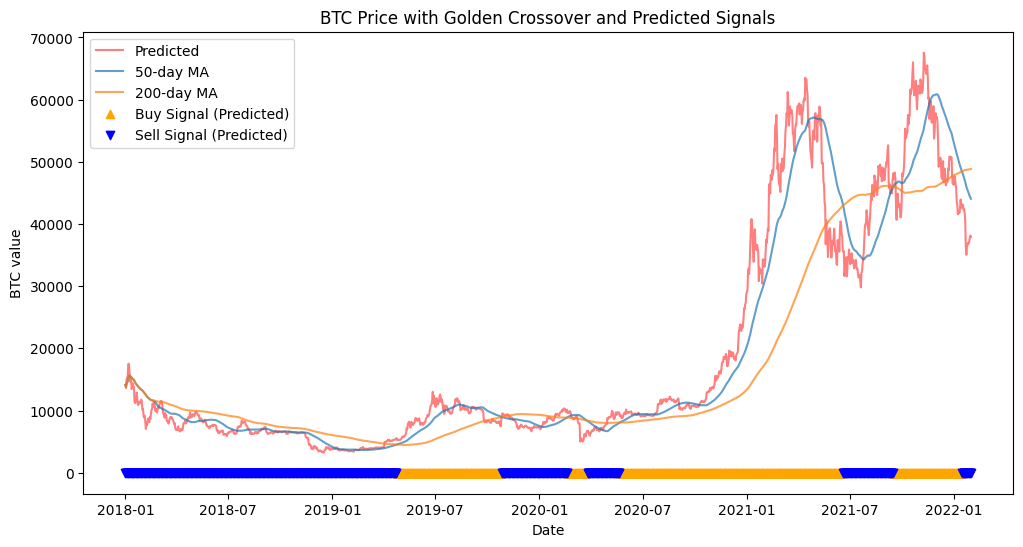

In [51]:
short_window = 50
long_window = 200

df['Short_MA'] = df['Open'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Open'].rolling(window=long_window, min_periods=1).mean()

df['Signal'] = 0
df['Prediction'] = regressor.predict(input_value)
df.loc[df['Short_MA'] > df['Long_MA'], 'Signal'] = 1  # Set 1 for Golden Crossover

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], label='Predicted', alpha=0.5, color="red")
plt.plot(df.index, df['Short_MA'], label='50-day MA', alpha=0.7)
plt.plot(df.index, df['Long_MA'], label='200-day MA', alpha=0.7)

# Plot Buy and Sell signals for the predicted curve
buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == 0]

plt.scatter(buy_signals.index, buy_signals['Prediction'], marker='^', color='orange', label='Buy Signal (Predicted)')
plt.scatter(sell_signals.index, sell_signals['Prediction'], marker='v', color='blue', label='Sell Signal (Predicted)')

plt.title('BTC Price with Golden Crossover and Predicted Signals')
plt.xlabel('Date')
plt.ylabel('BTC value')
plt.legend()
plt.show()


## Candlestick here

In [ ]:
import candlestick
